Extracting Dataset using Kaggle API

In [ ]:
#installing the Kaggle library
!pip install Kaggle

In [ ]:
#configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

importing the Dog vs Cat Dataset from kaggle

In [ ]:
#kaggle API
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
#extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'
with ZipFile(dataset, 'r') as zip: #zip here is a variable, u can name it as u want
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
#extracting the compressed train.zip file

with ZipFile('/content/train.zip', 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
#counting the number of files in train folder
import os
path, dirs, files = next(os.walk('/content/train'))
files_count = len(files)
print('Number os images: ', files_count)

Number os images:  25000


Printing the names of images

In [ ]:
file_names = os.listdir('/content/train')
print(file_names)

['dog.724.jpg', 'dog.1357.jpg', 'dog.7716.jpg', 'dog.4060.jpg', 'cat.7157.jpg', 'cat.5814.jpg', 'cat.8109.jpg', 'dog.10326.jpg', 'dog.7520.jpg', 'cat.466.jpg', 'cat.6114.jpg', 'cat.3807.jpg', 'dog.9304.jpg', 'cat.4664.jpg', 'dog.3169.jpg', 'dog.10214.jpg', 'dog.1977.jpg', 'cat.1188.jpg', 'cat.6414.jpg', 'cat.7404.jpg', 'dog.6207.jpg', 'cat.8827.jpg', 'dog.12313.jpg', 'cat.2250.jpg', 'cat.6717.jpg', 'cat.4122.jpg', 'cat.2284.jpg', 'cat.11990.jpg', 'cat.6362.jpg', 'dog.734.jpg', 'cat.299.jpg', 'cat.6001.jpg', 'dog.123.jpg', 'dog.2624.jpg', 'dog.10169.jpg', 'cat.8800.jpg', 'cat.3303.jpg', 'dog.9898.jpg', 'dog.6680.jpg', 'dog.2089.jpg', 'cat.10409.jpg', 'dog.9744.jpg', 'cat.3006.jpg', 'cat.8198.jpg', 'dog.4623.jpg', 'dog.304.jpg', 'cat.4506.jpg', 'dog.7377.jpg', 'cat.6623.jpg', 'cat.9174.jpg', 'cat.10165.jpg', 'cat.10359.jpg', 'cat.1149.jpg', 'cat.182.jpg', 'dog.6608.jpg', 'dog.6774.jpg', 'dog.2926.jpg', 'dog.1278.jpg', 'cat.8435.jpg', 'dog.7448.jpg', 'cat.2964.jpg', 'dog.5796.jpg', 'dog.1

In [ ]:
file_names[-1]

'dog.9544.jpg'

Importing the Dependencies

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow


Displaying the images of dogs and cats

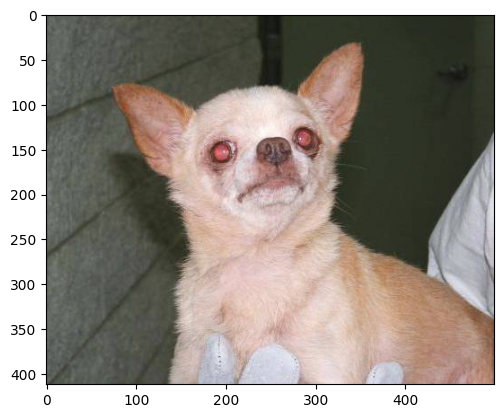

In [ ]:
# Displaying Dog image
img = mpimg.imread('/content/train/dog.7716.jpg')
plt.imshow(img)

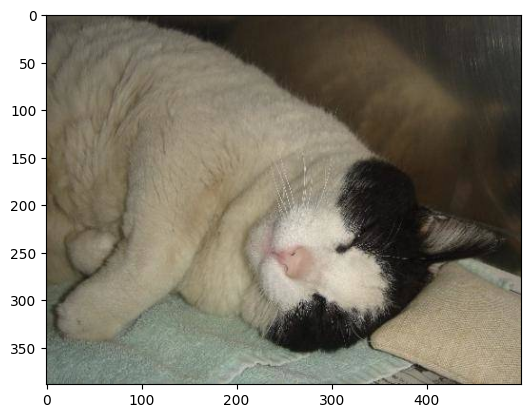

In [ ]:
#Displaying Cat image
img = mpimg.imread('/content/train/cat.7157.jpg')
plt.imshow(img)

Counting the number of cat and dog image

In [ ]:
#creating a list of names of image in train folder
file_names = os.listdir('/content/train')

dog_num = 0
cat_num = 0
for img in  file_names:
  if img[0:3] == 'dog':
    dog_num+=1
  else:
    cat_num+=1

print('dog : ',dog_num)
print('cat : ',cat_num)

dog :  12500
cat :  12500


Resizeing all the Images

In [ ]:
#creating a directory for resized images
os.mkdir('/content/image resized')

In [ ]:
original_folder = '/content/train/'
resized_foler = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224,224))
  img = img.convert('RGB')

  newImgPath = resized_foler+filename
  img.save(newImgPath)


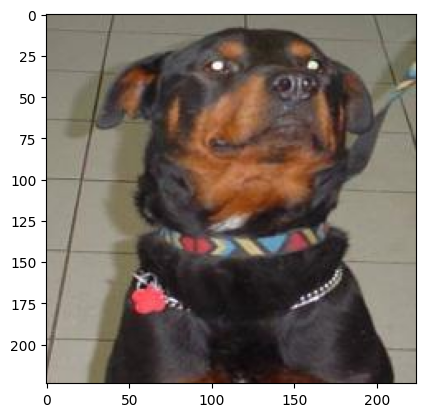

In [ ]:
# Displaying resized Dog image
img = mpimg.imread('/content/image resized/dog.724.jpg')
plt.imshow(img)

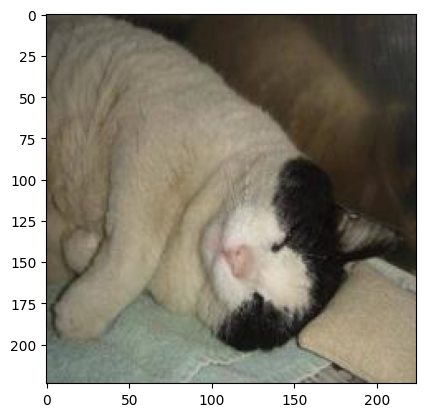

In [ ]:
# Displaying resized cat image
img = mpimg.imread('/content/image resized/cat.7157.jpg')
plt.imshow(img)

**Creating Labels for resized images of dogs and cat**

cat -> 0

dog -> 1

In [ ]:
#create a for loop to assign labels

labels = []
file_names = os.listdir('/content/image resized/')

for file in file_names:

  if file[0:3] == 'dog':
    labels.append(1)
  else:
    labels.append(0)

In [ ]:
print(file_names[0:5])
print(len(file_names))

['dog.724.jpg', 'dog.1357.jpg', 'dog.7716.jpg', 'dog.4060.jpg', 'cat.7157.jpg']
2000


In [ ]:
print(labels[0:5])
print(len(labels))

[1, 1, 1, 1, 0]
2000


In [ ]:
#counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1030  970]


Converting all the resized images to numpy array

In [ ]:
import cv2
import glob

In [ ]:
img_directory = '/content/image resized/'  # 1. Set the directory path
img_extension = ['png', 'jpg']             # 2. Set allowed image file extensions

files = []                                 # 3. Initialize an empty list to store file paths

[files.extend(glob.glob(img_directory + '*.' + e)) for e in img_extension]  # 4. Get all image files with specified extensions

dog_cat_images = np.asarray([cv2.imread(file) for file in files])  # 5. Load images into a NumPy array


glob.glob(pattern):

The glob module in Python is used for file pattern matching.

This function returns a list of file paths that match a specific pattern.

In [ ]:
files[0:5]

['/content/image resized/dog.724.jpg',
 '/content/image resized/dog.1357.jpg',
 '/content/image resized/dog.7716.jpg',
 '/content/image resized/dog.4060.jpg',
 '/content/image resized/cat.7157.jpg']

In [ ]:
dog_cat_images[0:2]

array([[[[113, 125, 129],
         [113, 125, 129],
         [113, 125, 129],
         ...,
         [106, 120, 119],
         [105, 119, 118],
         [105, 119, 118]],

        [[113, 125, 129],
         [113, 125, 129],
         [114, 126, 130],
         ...,
         [106, 120, 119],
         [106, 120, 119],
         [105, 119, 118]],

        [[113, 125, 129],
         [114, 126, 130],
         [114, 126, 130],
         ...,
         [107, 121, 120],
         [106, 120, 119],
         [106, 120, 119]],

        ...,

        [[155, 165, 175],
         [159, 169, 179],
         [149, 159, 169],
         ...,
         [147, 158, 162],
         [147, 158, 162],
         [148, 159, 163]],

        [[159, 169, 179],
         [156, 166, 176],
         [147, 157, 167],
         ...,
         [145, 156, 160],
         [146, 157, 161],
         [146, 157, 161]],

        [[160, 170, 180],
         [154, 164, 174],
         [146, 156, 166],
         ...,
         [145, 156, 160],
        

In [ ]:
type(dog_cat_images)

numpy.ndarray

In [ ]:
dog_cat_images.shape

(2000, 224, 224, 3)

In [ ]:
x = dog_cat_images
y = np.asarray(labels)

**Train Test Split**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=6, stratify=y)

In [ ]:
print(x_test.shape, x_train.shape)

(400, 224, 224, 3) (1600, 224, 224, 3)


**Scalling the data**

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
print(x_train)

[[[[0.16078431 0.18431373 0.18039216]
   [0.02745098 0.05882353 0.05882353]
   [0.01960784 0.06666667 0.08235294]
   ...
   [0.4745098  0.29803922 0.19215686]
   [0.4745098  0.29803922 0.19215686]
   [0.4745098  0.29803922 0.19215686]]

  [[0.21176471 0.24313725 0.23921569]
   [0.09411765 0.13333333 0.13333333]
   [0.08235294 0.14117647 0.15294118]
   ...
   [0.46666667 0.29019608 0.18431373]
   [0.4627451  0.28627451 0.18039216]
   [0.4627451  0.28627451 0.18039216]]

  [[0.19215686 0.24313725 0.23529412]
   [0.1372549  0.19215686 0.18823529]
   [0.14117647 0.21568627 0.22745098]
   ...
   [0.46666667 0.29019608 0.18431373]
   [0.4627451  0.28627451 0.18039216]
   [0.45882353 0.28235294 0.17647059]]

  ...

  [[0.00392157 0.05098039 0.09803922]
   [0.12941176 0.17647059 0.21568627]
   [0.31372549 0.36078431 0.4       ]
   ...
   [0.31764706 0.36470588 0.43529412]
   [0.31372549 0.35686275 0.43529412]
   [0.30196078 0.34509804 0.42352941]]

  [[0.09411765 0.14509804 0.2       ]
   [0.1

**Building the Neural Network**

In [ ]:
!pip install tensorflow==2.14

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.8/489.8 MB 880.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.9 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.0
    Uninstalling ml-dtypes-0.4.0:
      Successfully uninstalled ml-dtypes-0.4.0
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: google-auth-oauthlib
    Found existing i

In [ ]:
!pip install tensorflow-hub == 0.15

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [ ]:
num_of_classes = 2

model = tf.keras.Sequential([
                             pretrained_model,
                             tf.keras.layers.Dense(num_of_classes)
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense_2 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)

In [ ]:
model.fit(x_train,y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 69s 1s/step - loss: 0.1827 - acc: 0.9306
Epoch 2/5
50/50 [==============================] - 67s 1s/step - loss: 0.0703 - acc: 0.9781
Epoch 3/5
50/50 [==============================] - 94s 2s/step - loss: 0.0536 - acc: 0.9831
Epoch 4/5
50/50 [==============================] - 85s 2s/step - loss: 0.0429 - acc: 0.9869
Epoch 5/5
50/50 [==============================] - 83s 2s/step - loss: 0.0361 - acc: 0.9900


In [ ]:
score, acc = model.evaluate(x_test, y_test)
print('Test loss = ', score)
print('Test accuracy = ', acc)

13/13 [==============================] - 24s 2s/step - loss: 0.0657 - acc: 0.9750
Test loss =  0.06571695953607559
Test accuracy =  0.9750000238418579


**Predictive System**

Path of the Image: /content/dog.jpg


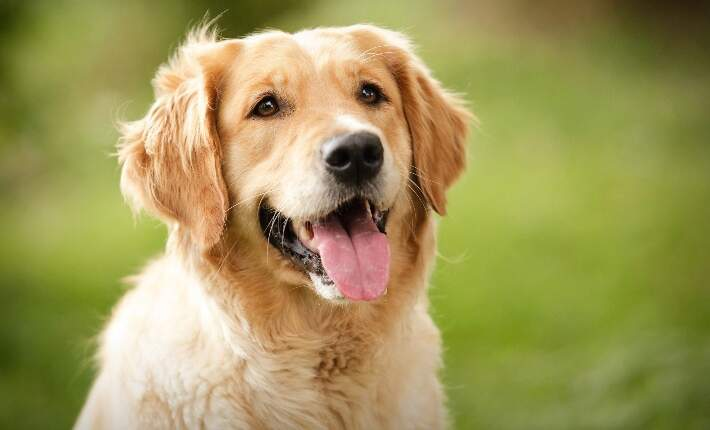

1/1 [==============================] - 0s 122ms/step
The image represents a Dog


In [ ]:
#/content/train/dog.9544.jpg
input_img_path = input('Path of the Image: ')
#maybe we will maka a condition for file extention

input_img = cv2.imread(input_img_path)
cv2_imshow(input_img)

#resize img and convert to RGB
resized_img = cv2.resize(input_img, (224,224))

#scalling
img_scaled = resized_img/255

#reshape
img_resaped = np.reshape(img_scaled, [1,224,224,3])

#prediction
img_pred = model.predict(img_resaped)
img_pred_label = np.argmax(img_pred)

if img_pred_label == 0:
  print('The image represents a Cat')
else:
  print('The image represents a Dog')